In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [12]:
from google.colab import drive
drive.mount('/content/drive')
# Import the os module
import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
# Specify the directory containing the data files
data_dir = '/content/drive/My Drive/Forescasting-ML/Data'

# Get a list of all .dat files in the directory
file_paths = sorted([os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.dat')])

# Corrected the function name from read_cvs to read_csv
# Use the data_dir variable to specify the file path
train = pd.read_csv(os.path.join(data_dir, 'train.csv'))
test = pd.read_csv(os.path.join(data_dir, 'test.csv'))

In [18]:
#train the data
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [19]:
train.info()
train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


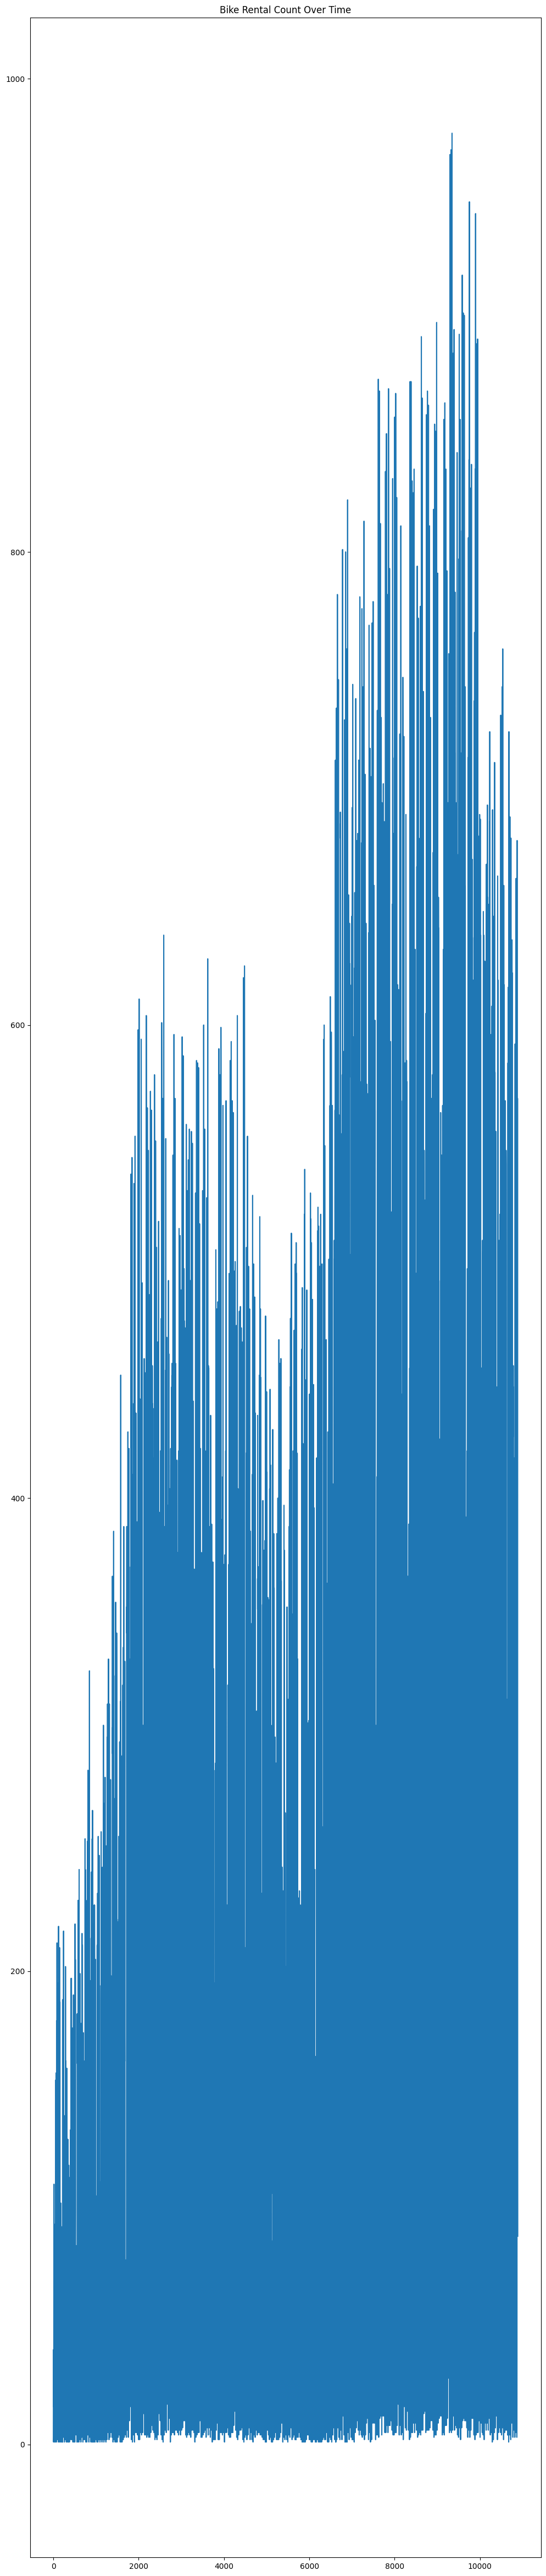

In [22]:
plt.figure(figsize=(12,60))
train['count'].plot()
plt.title('Bike Rental Count Over Time')
plt.show()

In [26]:
train['datetime'] = pd.to_datetime(train['datetime']) # Corrected the column name here
test['datetime'] = pd.to_datetime(test['datetime'])
for df in [train, test]:
    df['hour'] = df['datetime'].dt.hour
    df['day'] = df['datetime'].dt.day
    df['month'] = df['datetime'].dt.month
    df['year'] = df['datetime'].dt.year
    df['weekday'] = df['datetime'].dt.weekday

In [27]:
features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'hour', 'day', 'month', 'year', 'weekday']
target = 'count'

X = train[features]
y = train[target]


In [28]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [30]:
preds = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, preds))
print(f'Validation RMSE: {rmse}')


Validation RMSE: 38.647008937514755


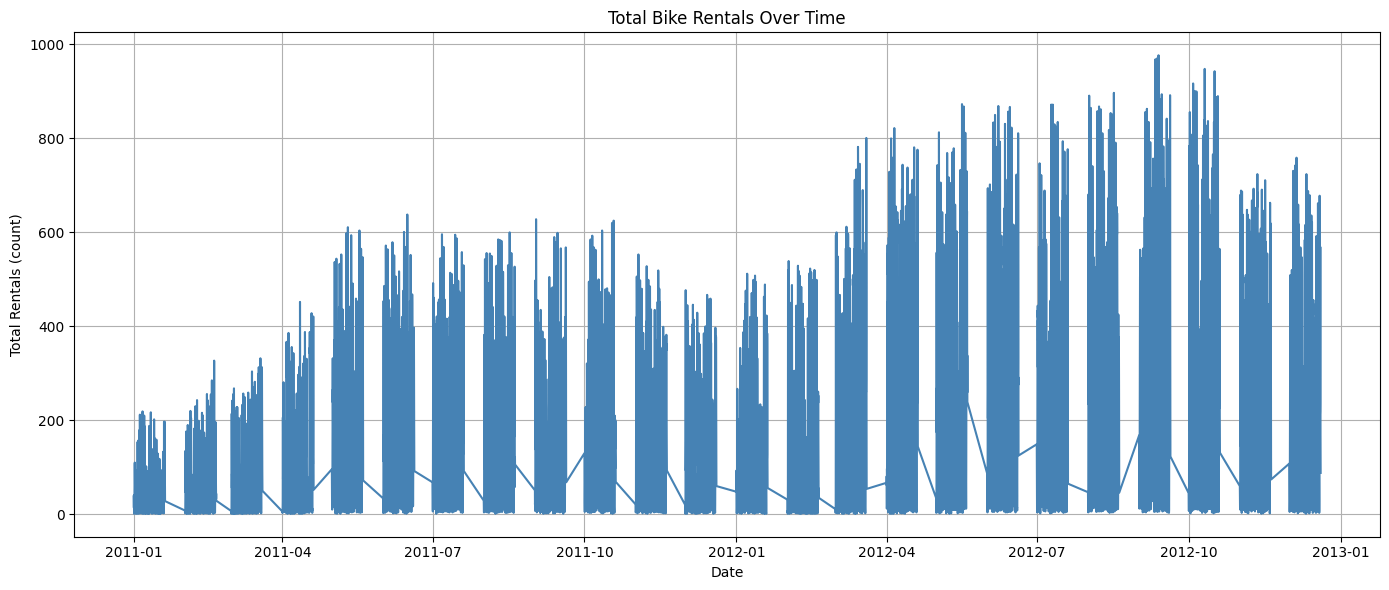

In [36]:
# Plot
plt.figure(figsize=(14,6))
plt.plot(train['datetime'], train['count'], color='steelblue')
plt.title('Total Bike Rentals Over Time')
plt.xlabel('Date')
plt.ylabel('Total Rentals (count)')
plt.grid(True)
plt.tight_layout()
plt.show()


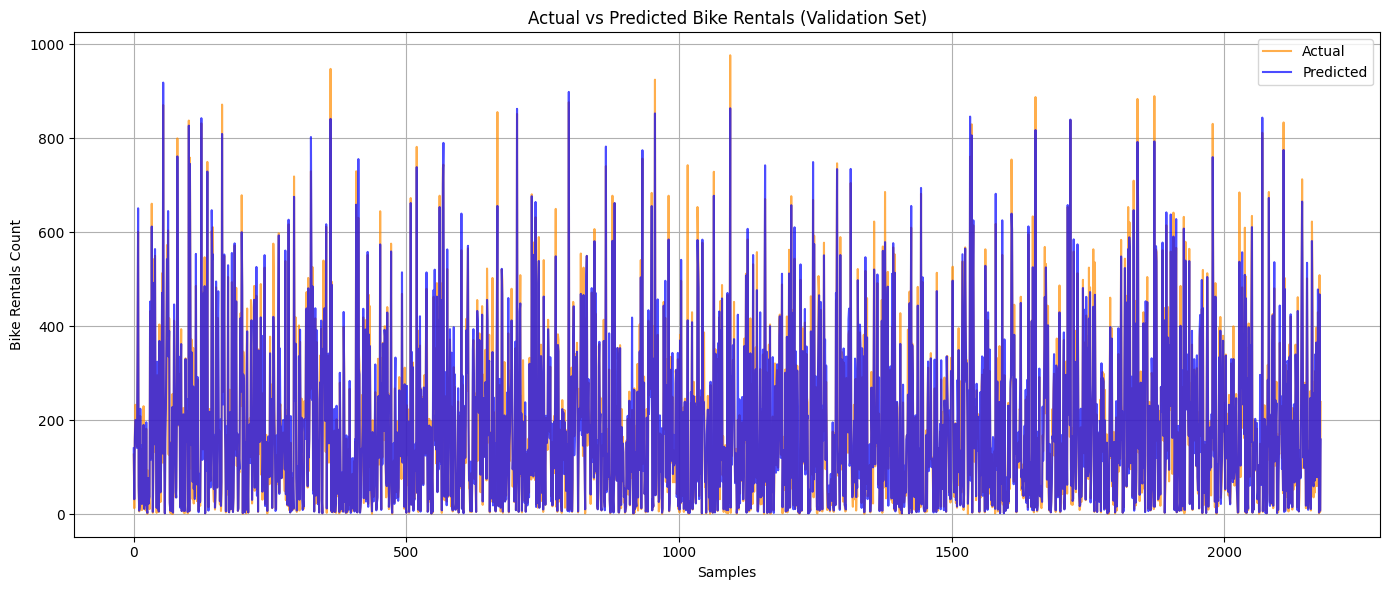

In [37]:
# Create a DataFrame to compare
comparison = pd.DataFrame({
    'Actual': y_val.values,
    'Predicted': y_pred
}).reset_index(drop=True)

# Plot
plt.figure(figsize=(14,6))
plt.plot(comparison['Actual'], label='Actual', color='darkorange', alpha=0.7)
plt.plot(comparison['Predicted'], label='Predicted', color='blue', alpha=0.7)
plt.title('Actual vs Predicted Bike Rentals (Validation Set)')
plt.xlabel('Samples')
plt.ylabel('Bike Rentals Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
